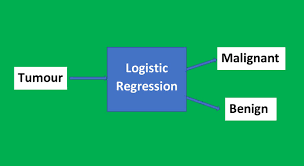

In [3]:
from PIL import Image
Image.open('log.png')

# Brief Description

The purpose of this project is about classification, to predict if a patient's breast cancer is either benign or malignant by using predictor variables of:

1 - Clump Thickness

2 - Uniformity of Cell Size

3 - Uniformity of Cell Shape

4 - Marginal Adhesion

5 - Single Epithelial Cell Size

6 - Bare Nuclei

7 - Bland Chromatin

8 - Normal Nucleoli

9 - Mitoses

Logistic Regression was the algorithm used for the data model.

The data used was obtained from the UCI machine learning repository. Click on the link for the data https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29 


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Data Munging

In [5]:
df_cancer = pd.read_csv('breast_cancer.csv')
df_cancer.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
#Scaning the data frame for null values
df_cancer.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
#Dropping the Sample code column
df_cancer_2 = df_cancer.drop(columns='Sample code number', 
                             axis = 1)

df_cancer_2.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Checking for multicollinearity between the predictor variables

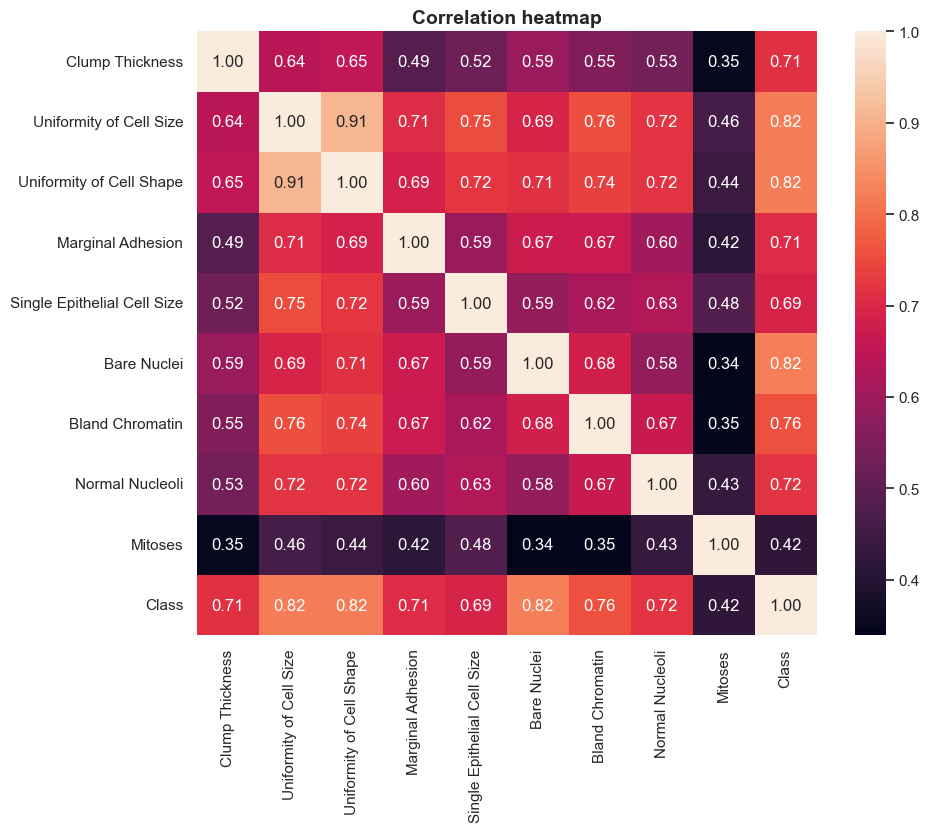

In [8]:
#checking for multicollinearity using heatmap
sns.heatmap(df_cancer_2.corr(), 
            annot=True, 
            fmt='.2f')

plt.title('Correlation heatmap', 
          fontsize =14, 
          fontweight = 'bold')

plt.show()

From the heatmap some of the predictor variables some to be correlation. Will implement the Variance Inflation Factor to determine the associated correlation

What is Variance Inflation Factor (VIF)?

VIF measures the amount of multicollinearity in a set of multiple regression variables. A high value of VIF indicates that the associated independent variables have a high correlation with each other.

A VIF of 1 indicates the predictor variables are not correlated, a VIF between 1 and 5 indicates a moderate correlation, and a VIF above 5 indicates a high correlation, which is a cause of concern for your model and must be investigated further to be corrected.


In [9]:
df_cancer_3 = df_cancer_2.drop('Class', 
                               axis =1)

X = add_constant(df_cancer_3) 
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                          5.093670
Clump Thickness                1.905699
Uniformity of Cell Size        7.194723
Uniformity of Cell Shape       6.549805
Marginal Adhesion              2.466275
Single Epithelial Cell Size    2.556334
Bare Nuclei                    2.597163
Bland Chromatin                2.879024
Normal Nucleoli                2.431402
Mitoses                        1.396579
dtype: float64

The VIF of uniformity of cell size and uniformity of cell shape is highly correlated as VIF is above 5. I will remove the Uniformity of cell size and recalculate VIF.

In [10]:
df_cancer_4 = df_cancer_3.drop('Uniformity of Cell Size',
                               axis =1)

X2 = add_constant(df_cancer_4) 

pd.Series([variance_inflation_factor(X2.values, i) 
               for i in range(X2.shape[1])], 
              index=X2.columns)

const                          4.812578
Clump Thickness                1.888002
Uniformity of Cell Shape       3.990194
Marginal Adhesion              2.414223
Single Epithelial Cell Size    2.402298
Bare Nuclei                    2.594098
Bland Chromatin                2.777077
Normal Nucleoli                2.416644
Mitoses                        1.393591
dtype: float64

All VIF values are below 5 so can proceed to the train-test stage.

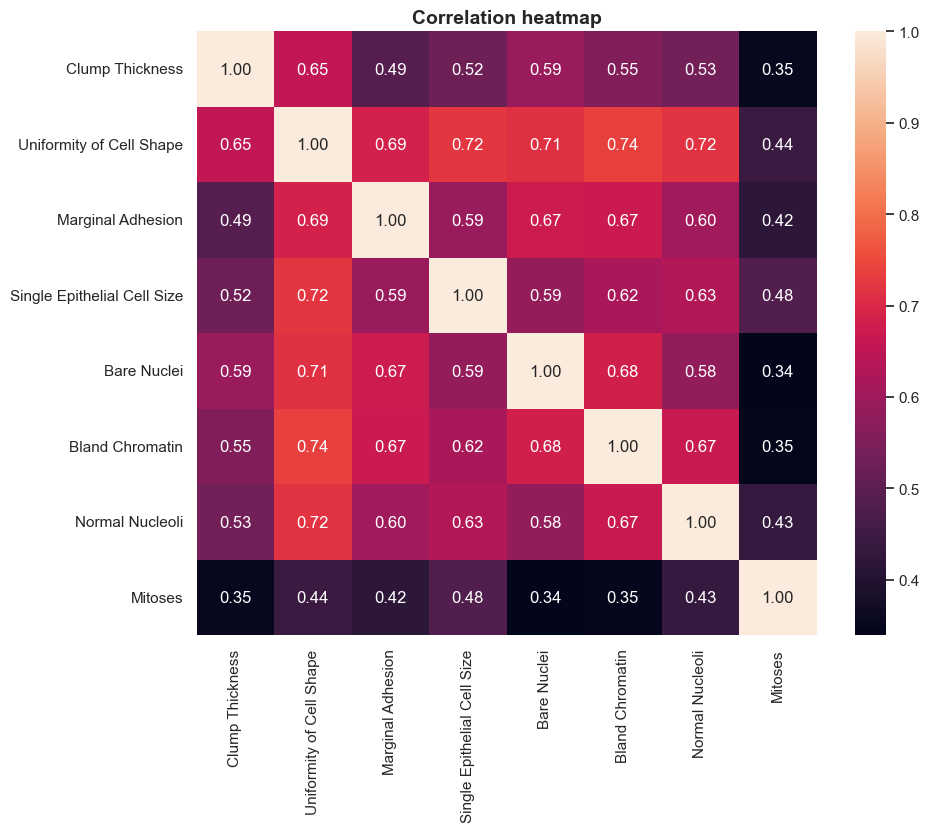

In [11]:
sns.heatmap(df_cancer_4.corr(), 
            annot=True, 
            fmt='.2f')

plt.title('Correlation heatmap', 
          fontsize =14, 
          fontweight = 'bold')

plt.show()

In [34]:
#Spliting the data frame into dependent and independent variables
x = df_cancer_2.drop(columns = ['Class', 'Uniformity of Cell Size'], 
                     axis = 1).values

y = df_cancer_2['Class'].values

In [35]:
print('x______')
print(x[0:5])
print('y______')
print(y[0:5])

x______
[[ 5  1  1  2  1  3  1  1]
 [ 5  4  5  7 10  3  2  1]
 [ 3  1  1  2  2  3  1  1]
 [ 6  8  1  3  4  3  7  1]
 [ 4  1  3  2  1  3  1  1]]
y______
[2 2 2 2 2]


# Splitting data into training and test set

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [37]:
#training the model
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [38]:
#predicting the model
y_pred = logistic_model.predict(x_test)

In [39]:
#testing the accuracy of the model
accuracy_score(y_test, y_pred)

0.9562043795620438

Model has a strong accuracy of 95.62%

In [42]:
#Showing the true values and predicted values as a data fram
pd.set_option('display.max_rows', None)
pd.DataFrame((np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 
                             axis =1)), 
             columns=['y_pred','y_test'])

,y_pred,y_test
0,2,2
1,2,2
2,4,4
3,4,4
4,2,2
5,2,2
6,2,2
7,4,4
8,2,2
9,2,2


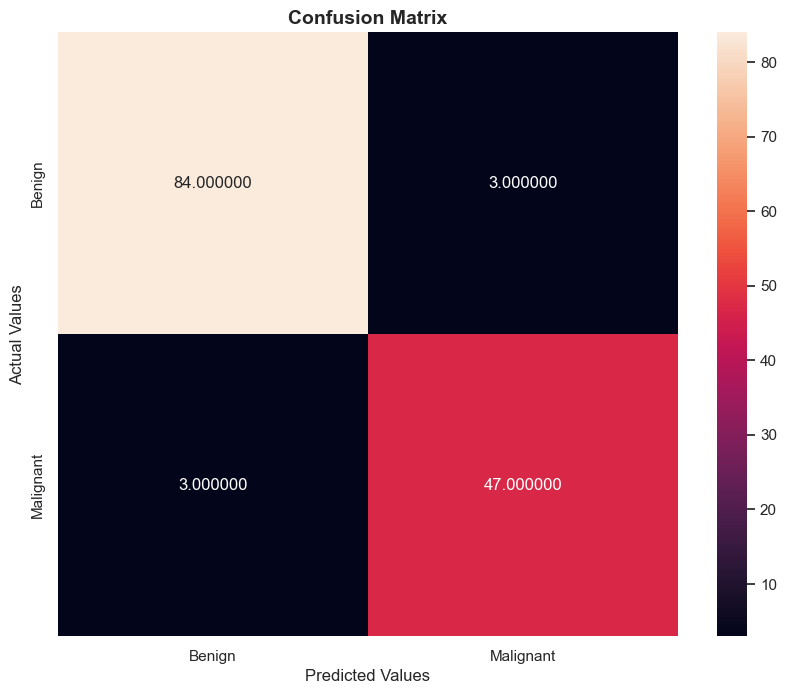

In [50]:
#plotting the confusion matrix on a heatmap
con_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(con_matrix, 
                 annot=True, 
                 fmt='f')

ax.set_title('Confusion Matrix', 
             fontsize = 14, 
             fontweight = 'bold')

ax.set_xlabel('Predicted Values')

ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['Benign (2)','Malignant (4)'])
  
ax.yaxis.set_ticklabels(['Benign (2)','Malignant (4)'])

plt.show()

**WHAT IS A CONFUSION MATRIX**

A confusion matrix is used to determine the classifier performance based on true positive(TP), true negative(TN), false postive(FN) and false negative(FN).

In the case of this model:

TN -> 84 people without breast cancer were correctly predicted.

TP -> 47 people with breast cancer correctly predicted.

FN -> 3 people were misclassified as not having breast cancer.

FP -> 3 people were misclassified as having breast cancer.

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



COMMENTS ON THE CLASSIFICATION REPORT

In the classification report there are 3 important metrics which are the precision, recall and f1-score

-> Precision measures the percentage of correct positive predictions relative to the total actual positives: For the model the precision is 94%.

-> Recall measures the percentage of correct positive predictions relative to total actual positives: For the model the recall is 94%.

-> F1-score is a weighted mean of precision and recall: for the model the F1-score is 94%

### k-fold cross validation to test the accuracy of the model

In [51]:
accuracies = cross_val_score(estimator = logistic_model,
                             X = x_train, 
                             y = y_train,
                             cv =10)

print("Accuracy: {:.2f} ".format(accuracies.mean()*100))

print("Std: {:.2f} ".format(accuracies.std()*100))

Accuracy: 96.89 
Std: 2.01 
